# Analysis of a two-phase (phase separated) simulation

In this previous example, we analyzed a simulation conducted above the critical temperature.
In this tutorial, we now consider an LJ simulation with potentially two phases at $T^*=1.2$.

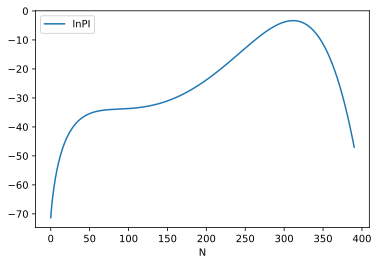

In [1]:
import numpy as np
import pandas as pd
import feasst as fst
import pyfeasst

# load the SRSW data from file
dfsrsw = pd.read_csv(fst.install_dir() + "/plugin/flat_histogram/test/data/stat120.csv")
ln_prob = fst.LnProbability(fst.DoubleVector(dfsrsw["lnPI"]))
beta = 1./1.2

# plot macrostate and energy
# Note: any line starting with % is only to be used with ipynb
# import matplotlib.pyplot as plt  # uncomment this line if using plain python, not ipynb
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
ax = dfsrsw.plot('N', 'lnPI')
# plt.show()  # uncomment this line if using plain python, not ipynb

Note that this macrostate distribution may contain a second maximum depending on the value of the chemical potential.
But at the chemical potential simulated, the low density phase is unstable and there is no minimum.

In [2]:
assert(len(ln_prob.minima()) == 0)

However, a minima appears after reweighting to a lower chemical potential. 

Text(0, 0.5, '$\\ln\\Pi$')

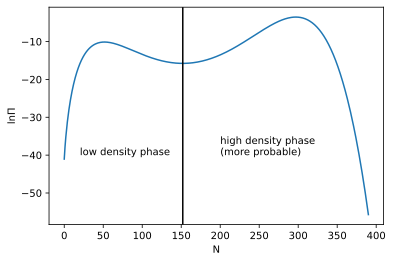

In [3]:
gce = fst.GrandCanonicalEnsemble(
    fst.Histogram(fst.args({"width": "1", "max": str(dfsrsw["N"].iloc[-1])})),
    ln_prob,
    -2.902929) # original conjugate, beta_mu = lnz
gce.reweight(-0.1)
plt.plot(gce.ln_prob().values())
minima = gce.ln_prob().minima()
assert(len(minima) == 1 and minima[0] == 152)
plt.gca().axvline(minima[0], color='black')
plt.text(20, -40, 'low density phase')
plt.text(200, -40, 'high density phase\n(more probable)')
plt.xlabel('N')
plt.ylabel(r'$\ln\Pi$')
# plt.show()  # uncomment this line if using plain python, not ipynb

Find the chemical potential at phase equilibrium subject to the constraint that the probability of observing the two phases are equal.

Text(0, 0.5, '$\\ln\\Pi$')

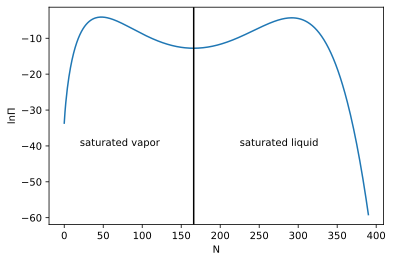

In [4]:
gce = pyfeasst.find_equilibrium(gce)

plt.plot(gce.ln_prob().values())
plt.gca().axvline(gce.ln_prob().minima()[0], color='black')
plt.text(20, -40, 'saturated vapor')
plt.text(225, -40, 'saturated liquid')
plt.xlabel('N')
plt.ylabel(r'$\ln\Pi$')
# plt.show()  # uncomment this line if using plain python, not ipynb

Compare chemical potential and equilibrium properties with published results.

https://www.nist.gov/mml/csd/chemical-informatics-research-group/sat-tmmc-liquid-vapor-coexistence-properties-long-range

In [7]:
assert(abs(-3.03 - gce.beta_mu()) < 0.01)
mins = gce.ln_prob().minima()
assert(len(mins) == 1 and mins[0] == 166)

volume = 8**3
pressure = gce.betaPV(0)/beta/volume
print('pressure:', pressure)
assert(abs(0.07722559602858005 - pressure) < 1e-8)

# pressure of both phases are equivalent
assert(abs(gce.betaPV(0) - gce.betaPV(1)) < 1e-5)

vapor_density = gce.average_macrostate(0)/volume # phase 0 is vapor
print('vapor_density:', vapor_density)
assert(abs(0.1003523021979188 - vapor_density) < 1e-8)

liquid_density = gce.average_macrostate(1)/volume # phase 1 is liquid
print('liquid_density:', liquid_density)
assert(abs(0.5631867734067794 - liquid_density) < 1e-8)

pressure: 0.077225595915682
vapor_density: 0.10035230188742573
liquid_density: 0.563186772959535


Did this tutorial work as expected? Did you find any inconsistencies or have any comments? Please [contact](../../../CONTACT.rst) us. Any feedback is appreciated!